In [2]:
#import dependences
import numpy as np
import pandas as pd
import pandas_datareader as web
import datetime as dt
%matplotlib inline
import plotly.graph_objects as go
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '${:,.2f}'.format

In [3]:
# set date time
start = dt.datetime(2021,1,1)
end = dt.datetime.now()

# cel price data
cel = web.DataReader('CEL-USD', 'yahoo', start, end)

In [4]:
# reset the index for use of prohet library
cel.reset_index(level=0, inplace=True)


In [5]:
# drop columns that are not needed
cel.drop(columns=['High', 'Low', 'Open', 'Volume', 'Close'], inplace=True)


In [6]:
# set columns for prophet library 
cel.columns = ['ds', 'y']


In [7]:
# Train model
m = Prophet(interval_width=0.95, yearly_seasonality=True)
model = m.fit(cel)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [8]:
# Forecast
future = m.make_future_dataframe(periods=100,freq='D')
forecast = m.predict(future)


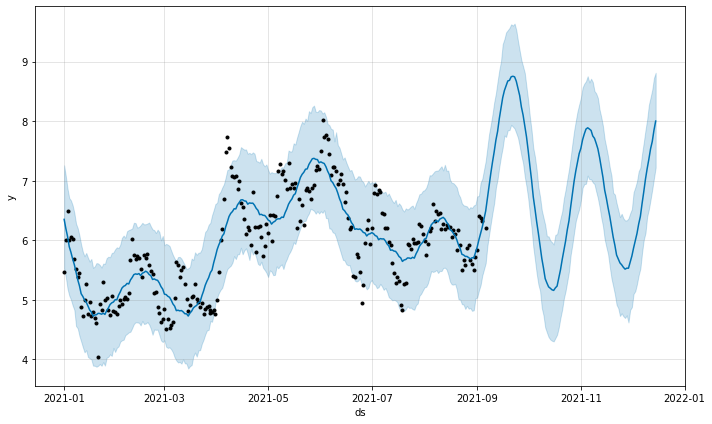

In [9]:
plot1 = m.plot(forecast)


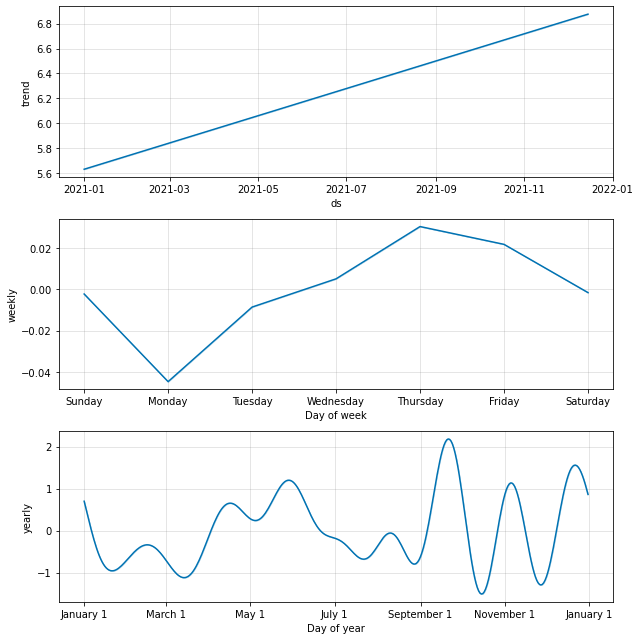

In [10]:
plt2 = m.plot_components(forecast)
